In [12]:
import time
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from cycler import cycler

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# grid_param_2 is the one you do want to plot on the x-axis (e.g max depth)
def plot_grid_search_2(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, set_x_log=False):
    # Get Test Scores Mean and std for each grid search
    scores_mean = np.array(cv_results['mean_test_score']).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = np.array(cv_results['std_test_score']).reshape(len(grid_param_2),len(grid_param_1))

    times_mean = np.array(cv_results['mean_fit_time']).reshape(len(grid_param_2), len(grid_param_1))
    # Plot Grid search scores
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax1.plot(grid_param_2, scores_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
        ax1.plot(grid_param_2, scores_mean[:,idx], '*')

        
    ax1.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax1.set_xlabel(name_param_2, fontsize=16)
    ax1.set_ylabel('CV Average Score', fontsize=16)
#     ax1.legend(loc="best", fontsize=15)
    ax1.grid('on')
    if set_x_log:
        ax1.set_xscale('log')
    
    for idx, val in enumerate(grid_param_1):
        ax2.plot(grid_param_2, times_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
        ax2.plot(grid_param_2, times_mean[:,idx], '*')
        
    ax2.set_title("Fit times", fontsize=20, fontweight='bold')
    ax2.set_xlabel(name_param_2, fontsize=16)
    ax2.set_ylabel('Seconds', fontsize=16)
    ax2.legend(loc="best", fontsize=15)
    ax2.grid('on')
    if set_x_log:
        ax2.set_xscale('log')


# plots in log
def plot_grid_search(cv_results, grid_param, name_param, set_x_log=False):
    test_scores_mean = np.array(cv_results['mean_test_score'])
    train_scores_mean = np.array(cv_results['mean_train_score'])
    fit_times_mean = np.array(cv_results['mean_fit_time'])
    
    print(test_scores_mean)
    print(train_scores_mean)
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.plot(grid_param, test_scores_mean, '--', label=  'test set')
    ax1.plot(grid_param, train_scores_mean, '--', label= 'train set')
    ax1.plot(grid_param, test_scores_mean, '*')
    ax1.plot(grid_param, train_scores_mean, '*')
    ax1.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax1.set_xlabel(name_param, fontsize=16)
    ax1.set_ylabel('Score', fontsize=16)
    ax1.legend(loc="best", fontsize=15)
    if set_x_log:
        ax1.set_xscale('log')
        
    ax2.plot(grid_param, fit_times_mean, '--')
    ax2.plot(grid_param, fit_times_mean, '*')
    ax2.set_title("Fit times", fontsize=20, fontweight='bold')
    ax2.set_xlabel(name_param, fontsize=16)
    ax2.set_ylabel('Seconds', fontsize=16)
    ax2.legend(loc="best", fontsize=15)
    ax2.grid('on')
    if set_x_log:
        ax2.set_xscale('log')



In [13]:
# want feature with more features than samples 
import pickle
with open("pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)
train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_labels.shape
X_train = train_imgs
y_train = train_labels.reshape(-1)
X_test = test_imgs
y_test = test_labels.reshape(-1)

2115

In [15]:
%time (SVC(kernel='poly', class_weight='balanced')).fit(X_train, y_train)

KeyboardInterrupt: 

In [18]:

# Set the parameters by cross-validation
tuned_parameters = [{'kernel' : ['linear', 'rbf', 'sigmoid'],
                     'C': [1, 10, 50],
                     'gamma': [0.0001, 0.005]}]


estimator = SVC(class_weight='balanced')

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator, tuned_parameters, cv=5,
                       scoring= score)
    %time gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()





# Tuning hyper-parameters for accuracy

CPU times: user 10min 16s, sys: 3.63 s, total: 10min 19s
Wall time: 10min 22s
Best parameters set found on development set:

{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}

Grid scores on development set:

0.998 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.998 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.998 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.998 (+/-0.001) for {'C': 1, 'gamma': 0.005, 'kernel': 'linear'}
0.999 (+/-0.001) for {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}
0.999 (+/-0.001) for {'C': 1, 'gamma': 0.005, 'kernel': 'sigmoid'}
0.998 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.999 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.998 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.998 (+/-0.001) for {'C': 10, 'gamma': 0.005, 'kernel': 'linear'}
0.999 (+/-0.001) for {'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}
0.998 (+/-0.001) for {'C': 10,

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=21).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=31).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/whe318

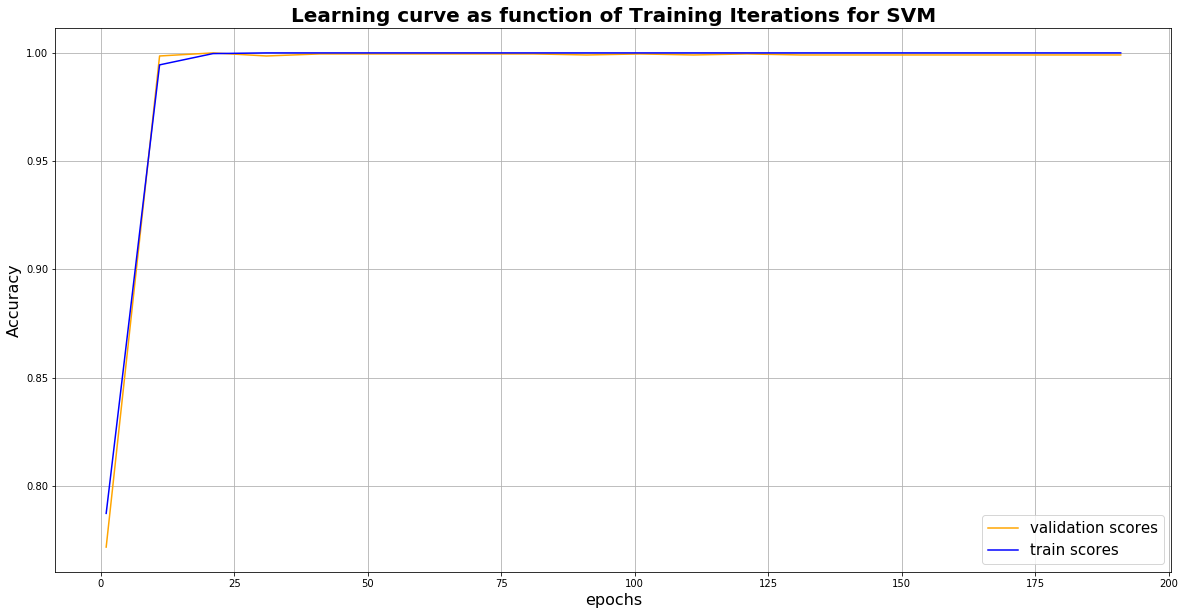

In [19]:
# plot_grid_search(gs.cv_results_, tuned_parameters[0]['n_estimators'], 'n_estimators', set_x_log=False)
estimator = SVC(kernel='rbf', C=50, gamma=0.005)
epochs = []
train_accuracies = []
test_accuracies = []
for i in range(1,200,10):
    estimator.set_params(max_iter=i) #  fresh untrained model
    estimator.fit(X_train, y_train)
    epochs.append(i)
    test_accuracies.append(estimator.score(X_test, y_test))
    train_accuracies.append(estimator.score(X_train, y_train))

plt.figure(figsize=(20, 10))
plt.title('Learning curve as function of Training Iterations for SVM', fontsize=20, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('epochs', fontsize=16)
plt.plot(epochs, test_accuracies, color='orange', label='validation scores')
plt.plot(epochs, train_accuracies, color='blue', label='train scores')
plt.grid(True)
plt.legend(loc='best', fontsize=15)
plt.show()

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


inner train size: 1266, inner test size: 11399
inner train size: 3799, inner test size: 8866
inner train size: 6332, inner test size: 6333
inner train size: 8865, inner test size: 3800
inner train size: 11398, inner test size: 1267


/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

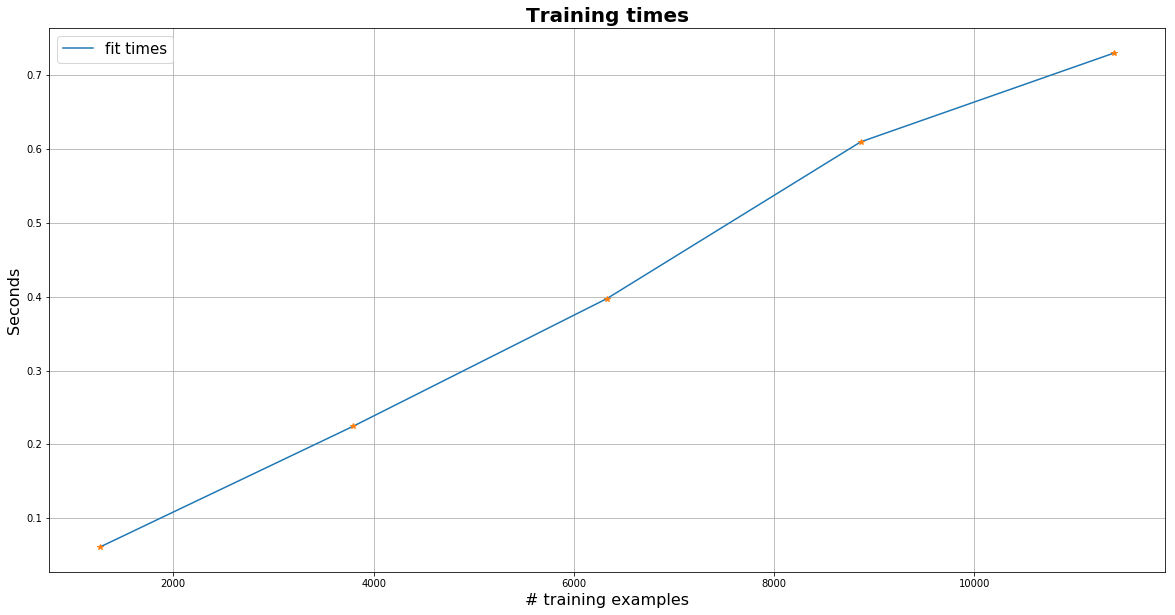

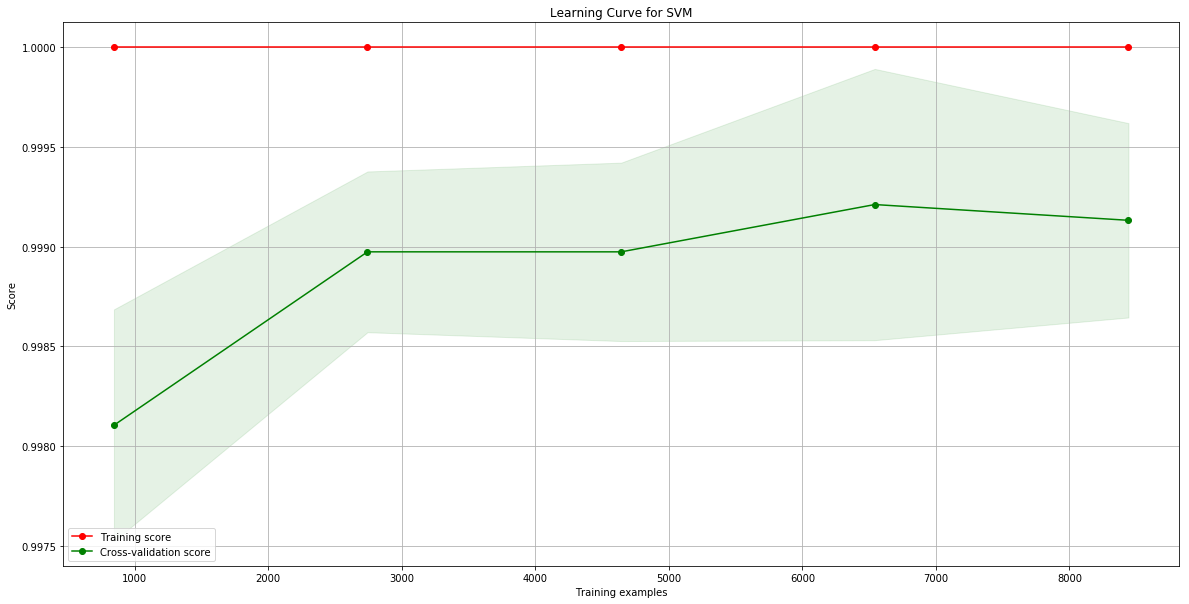

In [18]:
# pick the estimator with the best parameter and plot learning curve for it
# my own learning curve generator

X_test, y_test
train_sizes = []
train_scores=[]
test_scores=[]
fit_times=[]
for frac in np.linspace(0.1, 0.9, 5):
    inner_train_X, inner_test_X, inner_train_y, inner_test_y = train_test_split(X_train, y_train, train_size=frac, shuffle=True, stratify=y_train)
    print("inner train size: {}, inner test size: {}".format(len(inner_train_X), len(inner_test_X)))
    train_sizes.append(len(inner_train_X))
    start = time.time()
    estimator.fit(inner_train_X, inner_train_y)
    fit_times.append(time.time() - start)
    train_scores.append(estimator.score(inner_train_X, inner_train_y))
    test_scores.append(estimator.score(X_test, y_test)) # score on the original test set
    
# plt.figure(figsize=(20,10))
# plt.plot(train_sizes, train_scores, label='train')
# plt.plot(train_sizes, test_scores, label='test')
# plt.legend(loc='best')
# plt.show()


# associate the train times with the learning curve
plt.figure(figsize=(20,10))
plt.plot(train_sizes, fit_times, label='fit times')
plt.plot(train_sizes, fit_times, '*')
plt.ylabel('Seconds', fontsize=16)
plt.xlabel('# training examples', fontsize=16)
plt.title('Training times', fontsize=20, fontweight='bold')
plt.legend(loc='best', fontsize=15)
plt.grid('on')
# plt.show()

title = 'Learning Curve for SVM'
plot_learning_curve(estimator, title, X_train, y_train)
plt.show() 


In [ ]:
estimator = SVC(kernel='linear', class_weight='balanced', probability=True)
estimator.fit(X_train, y_train)


In [4]:
getattr(SVC(kernel='poly', class_weight='balanced'), '_pairwise')

False

In [11]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(3)
cv_iter = list(cv.split(X_train, y_train))
for train, test in cv_iter:
    print("len train: {}, len test: {}".format(len(train), len(test))) # same size train and same size test, but different indices each cv run

[   0    1    2 ... 4234 4235 4239]
len train: 8442, len test: 4223
[4203 4206 4208 ... 8532 8535 8536]
len train: 8444, len test: 4221
[ 8353  8355  8356 ... 12662 12663 12664]
len train: 8444, len test: 4221
